In [1]:
%matplotlib notebook

In [2]:
import pylab as pl

Generate synthetic cubes

In [3]:
import pyspeckit
from spectral_cube import SpectralCube
from astropy import units as u

In [80]:
import pyspeckit.spectrum.models.ammonia as ammonia
import pyspeckit.spectrum.models.ammonia_constants as nh3con
from pyspeckit.spectrum.units import SpectroscopicAxis as spaxis
import itertools

nspecpix = 50
nspacepix = 5

xarr11 = spaxis((np.linspace(-25, 25, nspecpix)*u.km/u.s),
                 refX=nh3con.freq_dict['oneone']*u.Hz,
                 velocity_convention='radio')
xarr22 = spaxis((np.linspace(-25, 25, nspecpix)*u.km/u.s),
                 refX=nh3con.freq_dict['twotwo']*u.Hz,
                 velocity_convention='radio')

cube11 = np.zeros([nspecpix,nspacepix,nspacepix])
cube22 = np.zeros([nspecpix,nspacepix,nspacepix])
for ii,jj in itertools.product(range(nspacepix), range(nspacepix)):
    tkin=np.random.rand()*10+20
    ntot=14.5+np.random.randn()/10
    while ntot < 14.2:
        ntot += 0.1
    width=1.5+np.random.rand()
    xoff_v=np.random.randn()*5
    tex = tkin * 0.8
    spec11 = ammonia.cold_ammonia(xarr11,
                                  tkin=tkin, ntot=ntot, width=width, xoff_v=xoff_v,
                                  tex=tex
                                  )
    spec22 = ammonia.cold_ammonia(xarr22, tkin=tkin, ntot=ntot, width=width, xoff_v=xoff_v, tex=tex)
    cube11[:,ii,jj] = spec11
    cube22[:,ii,jj] = spec22
    #print(spec11.max(), spec22.max())
noise11 = np.random.randn(*cube11.shape)/10.
noise22 = np.random.randn(*cube22.shape)/10.

In [81]:
cube_oneone = pyspeckit.Cube(cube=cube11+noise11, xarr=xarr11)
cube_twotwo = pyspeckit.Cube(cube=cube22+noise22, xarr=xarr22)
stack = pyspeckit.CubeStack([cube_oneone,cube_twotwo])

stack.plot_special = pyspeckit.wrappers.fitnh3.plotter_override
stack.plot_special_kwargs = {'fignum':3, 'vrange':[-50,50]}

INFO: Creating Cube Stack [pyspeckit.cubes.SpectralCube]
INFO: Concatenating data [pyspeckit.cubes.SpectralCube]


In [82]:
F=False
T=True
stack.fiteach(fittype='cold_ammonia',
              guesses=[25,15,14.2,2.8,0,0.1],
              integral=False,
              verbose_level=0,
              fixed=[F,F,F,F,F,T],
              limitedmax=[F,F,F,F,T,T],
              maxpars=[0,0,0,0,25,1],
              limitedmin=[T,T,T,T,T,T],
              minpars=[4,3,10,1,-25,0],
              start_from_point=(3,3),
              multicore=1)

INFO: Fitting up to 25 spectra [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


Using data std() as error.  If signal_cut is set, this can result in some pixels not being fit.
tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      1 of     25 at (   3,   3) s/n=  4.8. Elapsed time is 3.8 seconds.  %4 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header
INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,100 [pyspeckit.spectrum.interactive]


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.
tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.
Using data std() as error.  If signal_cut is set, this can result in some pixels not being fit.
tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      1 of     25 at (   3,   3) s/n=  4.8. Elapsed time is 11.5 seconds.  %4 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      2 of     25 at (   4,   3) s/n=  4.9. Elapsed time is 12.3 seconds.  %8 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      3 of     25 at (   2,   3) s/n=  5.4. Elapsed time is 13.8 seconds.  %12 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      4 of     25 at (   3,   2) s/n=  5.1. Elapsed time is 17.7 seconds.  %16 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      5 of     25 at (   3,   4) s/n=  5.1. Elapsed time is 18.7 seconds.  %20 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      6 of     25 at (   2,   2) s/n=  4.9. Elapsed time is 20.2 seconds.  %24 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      7 of     25 at (   2,   4) s/n=  4.7. Elapsed time is 24.3 seconds.  %28 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      8 of     25 at (   4,   2) s/n=  5.0. Elapsed time is 25.1 seconds.  %32 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit      9 of     25 at (   4,   4) s/n=  5.0. Elapsed time is 26.7 seconds.  %36 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     10 of     25 at (   1,   3) s/n=  4.2. Elapsed time is 27.5 seconds.  %40 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     11 of     25 at (   3,   1) s/n=  4.9. Elapsed time is 29.0 seconds.  %44 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     12 of     25 at (   4,   1) s/n=  5.1. Elapsed time is 30.1 seconds.  %48 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     13 of     25 at (   1,   2) s/n=  4.4. Elapsed time is 34.1 seconds.  %52 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     14 of     25 at (   2,   1) s/n=  5.3. Elapsed time is 35.4 seconds.  %56 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     15 of     25 at (   1,   4) s/n=  5.2. Elapsed time is 39.4 seconds.  %60 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     16 of     25 at (   1,   1) s/n=  4.8. Elapsed time is 43.4 seconds.  %64 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     17 of     25 at (   0,   3) s/n=  5.3. Elapsed time is 47.3 seconds.  %68 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     18 of     25 at (   3,   0) s/n=  5.1. Elapsed time is 48.8 seconds.  %72 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     19 of     25 at (   0,   2) s/n=  4.5. Elapsed time is 51.9 seconds.  %76 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     20 of     25 at (   4,   0) s/n=  4.7. Elapsed time is 55.7 seconds.  %80 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     21 of     25 at (   2,   0) s/n=  4.7. Elapsed time is 56.6 seconds.  %84 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     22 of     25 at (   0,   4) s/n=  4.5. Elapsed time is 60.0 seconds.  %88 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     23 of     25 at (   0,   1) s/n=  4.8. Elapsed time is 61.3 seconds.  %92 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     24 of     25 at (   1,   0) s/n=  4.7. Elapsed time is 65.3 seconds.  %96 [pyspeckit.cubes.SpectralCube]
Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


INFO: Finished fit     25 of     25 at (   0,   0) s/n=  4.8. Elapsed time is 66.5 seconds.  %100 [pyspeckit.cubes.SpectralCube]
INFO: Finished final fit 25.  Elapsed time was 66.5 seconds [pyspeckit.cubes.SpectralCube]


<IPython.core.display.Javascript object>


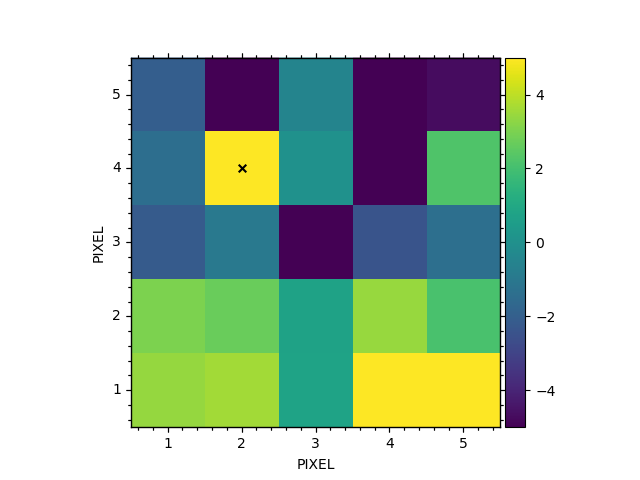

<IPython.core.display.Javascript object>


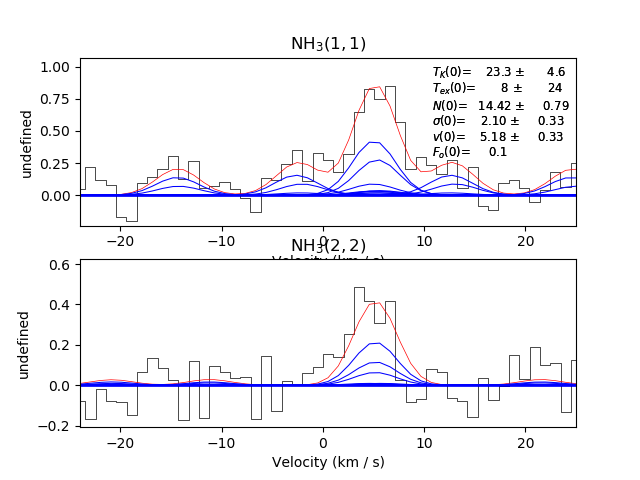

Assuming CUNIT3 is km/s in speccen_header


tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.
tex > trot in the ammonia model.  This is unphysical and suggests that you may need to constrain tex.  See ammonia_model_restricted_tex.


In [83]:
pl.close('all')
stack.mapplot(estimator=4, vmin=-5, vmax=5)
pl.figure(3)
stack.plot_spectrum(3,3)

pl.show()